<a href="https://colab.research.google.com/github/fatemafaria142/Precision-Crop-Recommendation-with-Machine-Learning-Algorithms/blob/main/Crop_Recommendation_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = "data\data.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [5]:
# Display the first few rows of the DataFrame
print("First few rows:")
df.head()

First few rows:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
# Display the last few rows of the DataFrame
print("\nLast few rows:")
df.tail()


Last few rows:


,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [7]:
total_length = len(df)
print(f"Total length of the dataset: {total_length} rows")

Total length of the dataset: 2200 rows


In [8]:
# Check for NaN values in the entire DataFrame
print(df.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [9]:
# Display general information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [11]:
# Display basic statistics for numerical columns
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [12]:
# Display basic statistics for all columns (including non-numerical)
df.describe(include='all')

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rice
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,NaN
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,NaN
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,NaN
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,NaN
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,NaN
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,NaN


In [13]:
# Check unique values and their counts in the "Label" column
label_counts = df['label'].value_counts()

# Display the result
print("Label counts:")
print(label_counts)

Label counts:
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64


In [18]:
# Display the result
print("Unique Labels:")
print(len(label_counts))

Unique Labels:
22


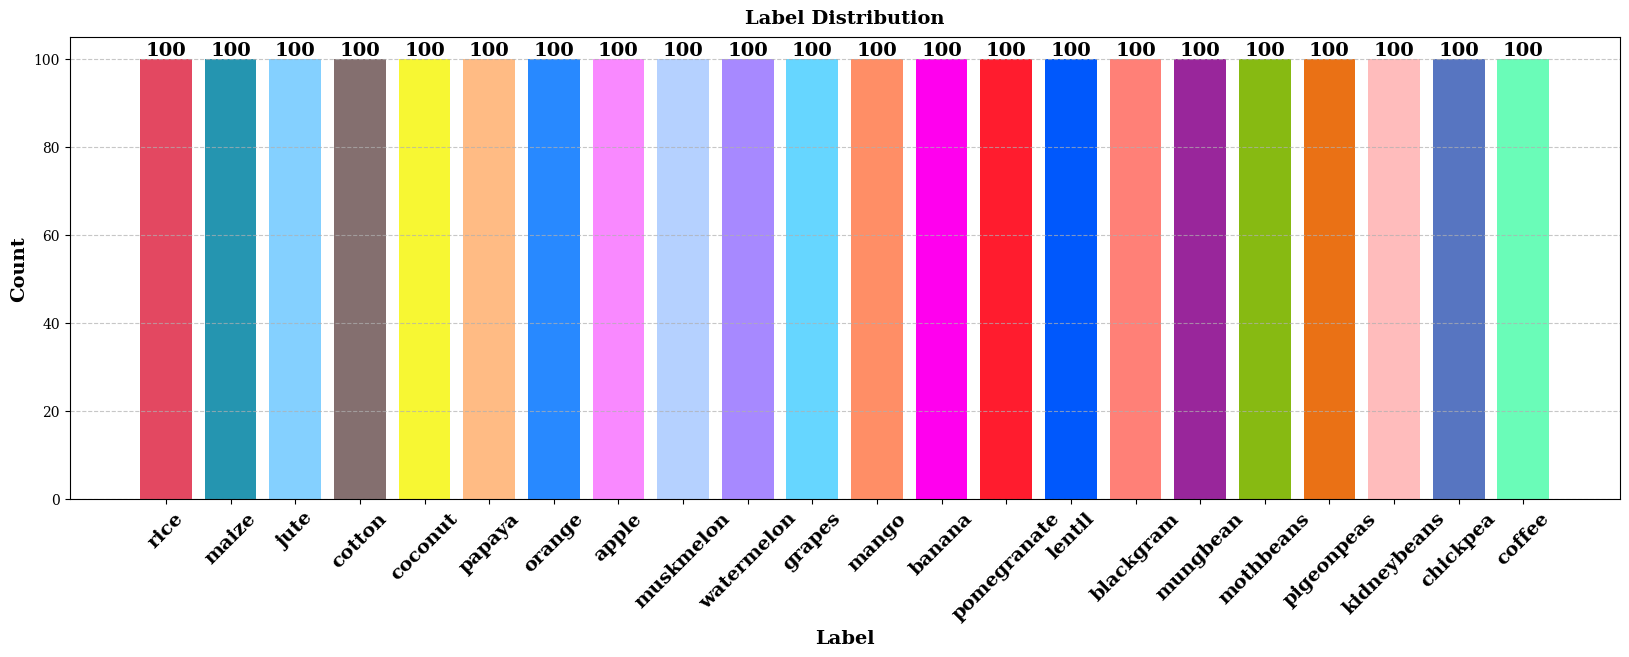

In [59]:
label_counts = df["label"].value_counts()

# Define custom colors for the bars
custom_colors = ['#e34861' , '#2595b0','#84d0ff', '#846f6f', '#f7f733', '#ffbb84', '#2889ff', '#f989ff', '#b5d1ff', '#a789ff',
                 '#66d6ff', '#ff8e66', '#ff00ee', '#ff1c2e', '#0058fc', '#ff8077','#99269b','#87ba12', '#ea7115','#ffbcbc',
                 '#5775c1', '#6afcb8']

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 14}

plt.figure(figsize=(20, 6))

# Create bar plot with grid
bars = plt.bar(label_counts.index, label_counts.values, color=custom_colors)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set title and axis labels using custom fontdict
plt.title('Label Distribution', fontdict=font,pad=10)
plt.xlabel('Label', fontdict=font)
plt.ylabel('Count', fontdict=font)

# Set custom font for ticks on both x and y axes with rotation
plt.xticks(label_counts.index, label_counts.index, fontdict=font, rotation=45)
plt.yticks(fontname='Serif', fontsize=10)

# Adding annotations (count values) on top of each bar
for bar, count in zip(bars, label_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontdict=font)

# Show the plot
plt.show()

In [29]:
# Check unique values and their counts in the "N" column
N_counts = df['N'].value_counts()

# Display the result
print("N counts:")
print(N_counts)

N counts:
22     44
40     44
27     42
39     41
31     41
       ..
136     2
139     1
135     1
130     1
46      1
Name: N, Length: 137, dtype: int64


In [30]:
# Check unique values and their counts in the "P" column
P_counts = df['P'].value_counts()

# Display the result
print("P counts:")
print(P_counts)

P counts:
60    56
58    48
56    46
55    44
57    42
      ..
83     2
82     2
90     2
93     1
84     1
Name: P, Length: 117, dtype: int64


In [31]:
# Check unique values and their counts in the "K" column
K_counts = df['K'].value_counts()

# Display the result
print("K counts:")
print(K_counts)

K counts:
17    90
22    87
15    86
20    80
25    78
      ..
5      8
11     8
13     7
7      5
80     4
Name: K, Length: 73, dtype: int64


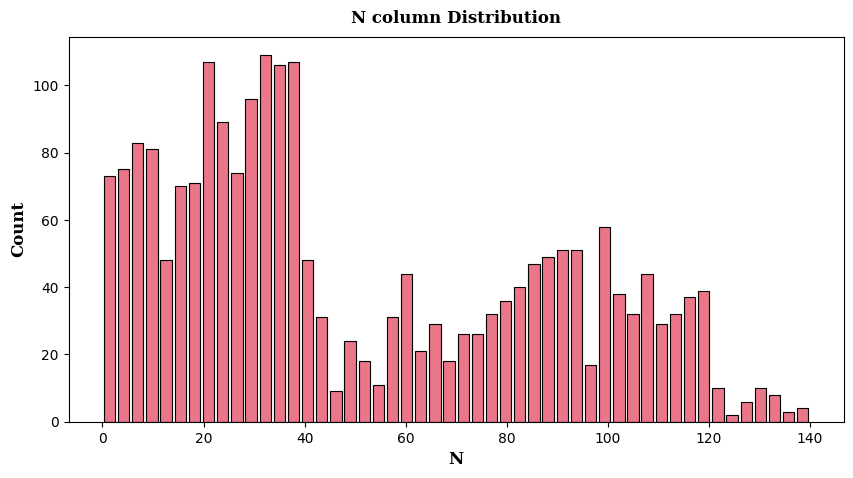

In [43]:
# Define custom colors for the bars
custom_colors = '#e34861'

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}

plt.rcParams["figure.figsize"] = (10, 5)

sns.histplot(data=df, x="N", bins=50, color=custom_colors,shrink=.8)
# Set title and axis labels using custom fontdict
plt.title('N column Distribution', fontdict=font,pad=10)
plt.xlabel('N', fontdict=font)
plt.ylabel('Count', fontdict=font)

plt.show()

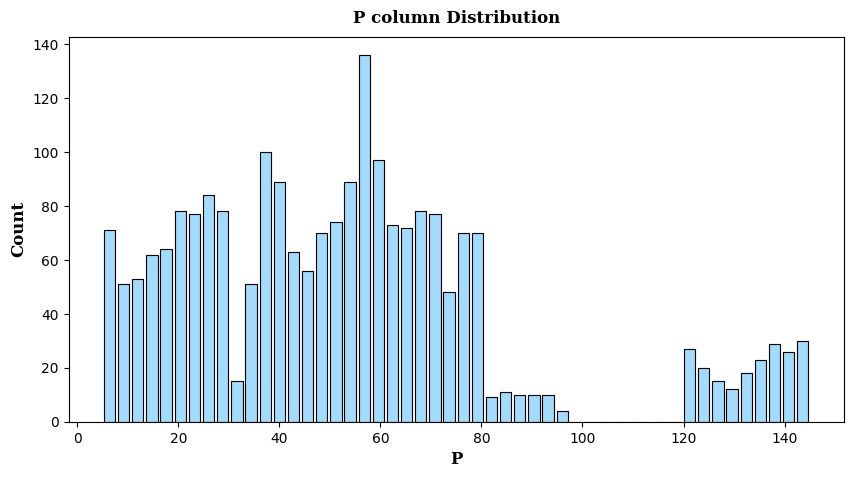

In [44]:
# Define custom colors for the bars
custom_colors = '#84d0ff'

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}

plt.rcParams["figure.figsize"] = (10, 5)

sns.histplot(data=df, x="P", bins=50, color=custom_colors,shrink=.8)
# Set title and axis labels using custom fontdict
plt.title('P column Distribution', fontdict=font,pad=10)
plt.xlabel('P', fontdict=font)
plt.ylabel('Count', fontdict=font)

plt.show()

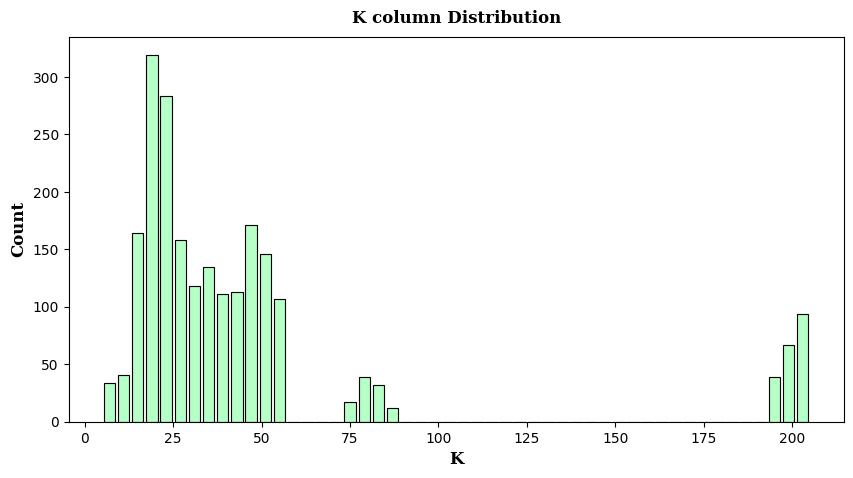

In [45]:
# Define custom colors for the bars
custom_colors = '#9effb3'

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}

plt.rcParams["figure.figsize"] = (10, 5)

sns.histplot(data=df, x="K", bins=50, color=custom_colors,shrink=.8)
# Set title and axis labels using custom fontdict
plt.title('K column Distribution', fontdict=font,pad=10)
plt.xlabel('K', fontdict=font)
plt.ylabel('Count', fontdict=font)

plt.show()

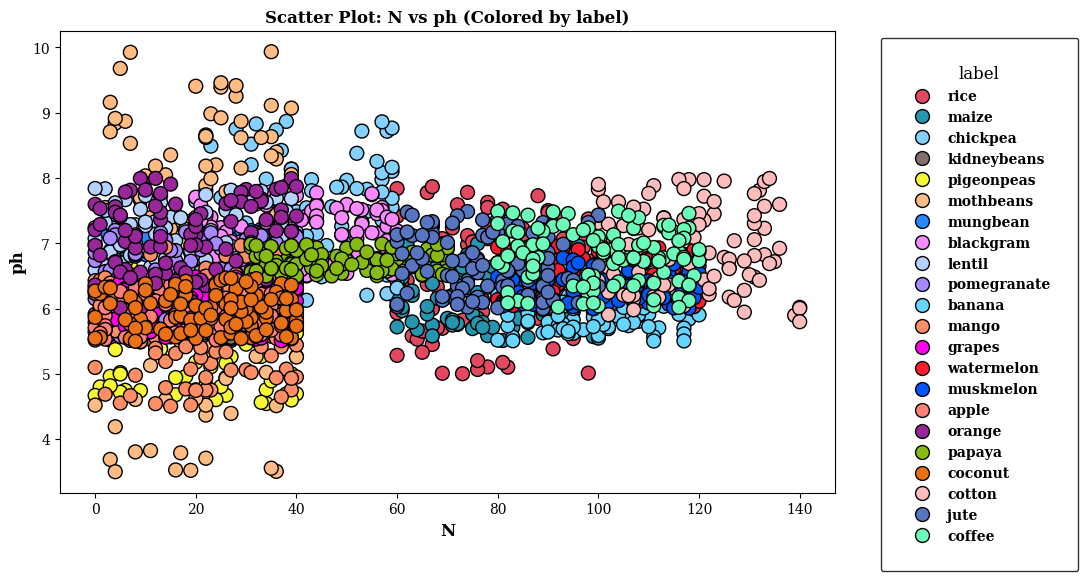

In [60]:
# Assuming df_filled contains the relevant columns
x_column = 'N'
y_column = 'ph'
hue_column = 'label'  # Replace with the third variable you want to use for color

# Define custom colors for the bars
custom_colors = ['#e34861' , '#2595b0','#84d0ff', '#846f6f', '#f7f733', '#ffbb84', '#2889ff', '#f989ff', '#b5d1ff', '#a789ff',
                 '#66d6ff', '#ff8e66', '#ff00ee', '#ff1c2e', '#0058fc', '#ff8077','#99269b','#87ba12', '#ea7115','#ffbcbc',
                 '#5775c1', '#6afcb8']

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}
font2 = {'family': 'Serif', 'weight': 'bold', 'size': 10}

plt.figure(figsize=(10, 6))

# Create a scatter plot for 'Size' against another numeric column with hue
sns.scatterplot(
    x=df[x_column],
    y=df[y_column],
    hue=df[hue_column],
    palette=custom_colors,
    s=100,               # Adjust the size of the circles
    linewidth=1,        # Adjust the border width
    edgecolor='black'   # Set the border color of the circles to black
)

# Set title and axis labels using custom fontdict
plt.title(f'Scatter Plot: {x_column} vs {y_column} (Colored by {hue_column})', fontdict=font)
plt.xlabel(x_column, fontdict=font)
plt.ylabel(y_column, fontdict=font)

plt.xticks(fontname='Serif', fontsize=10)
plt.yticks(fontname='Serif', fontsize=10)


# Display a legend with custom font and styling outside the plot
legend = plt.legend(title=hue_column,
                    prop=font2,
                    fontsize=8,
                    fancybox=True,
                    frameon=True,
                    facecolor='white',
                    edgecolor='black',
                    borderpad=2,
                    bbox_to_anchor=(1.05, 1),
                    loc='upper left')
legend.get_title().set_fontsize(12)  # Adjust the font size of the legend title
legend.get_title().set_fontfamily('Serif')  # Adjust the font family of the legend title

plt.show()


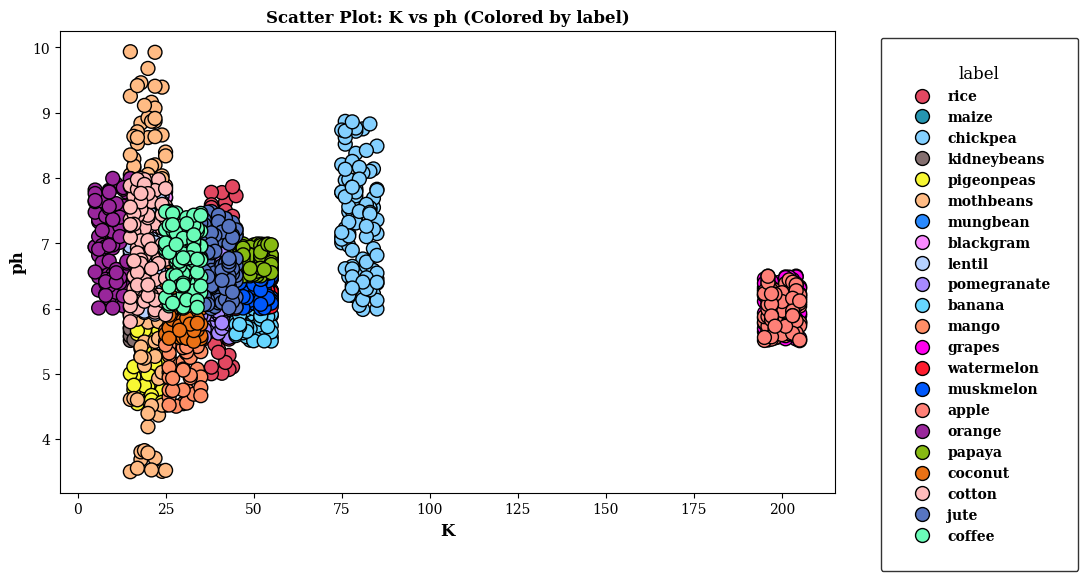

In [61]:
# Assuming df_filled contains the relevant columns
x_column = 'K'
y_column = 'ph'
hue_column = 'label'  # Replace with the third variable you want to use for color

# Define custom colors for the bars
custom_colors = ['#e34861' , '#2595b0','#84d0ff', '#846f6f', '#f7f733', '#ffbb84', '#2889ff', '#f989ff', '#b5d1ff', '#a789ff',
                 '#66d6ff', '#ff8e66', '#ff00ee', '#ff1c2e', '#0058fc', '#ff8077','#99269b','#87ba12', '#ea7115','#ffbcbc',
                 '#5775c1', '#6afcb8']

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}
font2 = {'family': 'Serif', 'weight': 'bold', 'size': 10}

plt.figure(figsize=(10, 6))

# Create a scatter plot for 'Size' against another numeric column with hue
sns.scatterplot(
    x=df[x_column],
    y=df[y_column],
    hue=df[hue_column],
    palette=custom_colors,
    s=100,               # Adjust the size of the circles
    linewidth=1,        # Adjust the border width
    edgecolor='black'   # Set the border color of the circles to black
)

# Set title and axis labels using custom fontdict
plt.title(f'Scatter Plot: {x_column} vs {y_column} (Colored by {hue_column})', fontdict=font)
plt.xlabel(x_column, fontdict=font)
plt.ylabel(y_column, fontdict=font)

plt.xticks(fontname='Serif', fontsize=10)
plt.yticks(fontname='Serif', fontsize=10)


# Display a legend with custom font and styling outside the plot
legend = plt.legend(title=hue_column,
                    prop=font2,
                    fontsize=8,
                    fancybox=True,
                    frameon=True,
                    facecolor='white',
                    edgecolor='black',
                    borderpad=2,
                    bbox_to_anchor=(1.05, 1),
                    loc='upper left')
legend.get_title().set_fontsize(12)  # Adjust the font size of the legend title
legend.get_title().set_fontfamily('Serif')  # Adjust the font family of the legend title

plt.show()


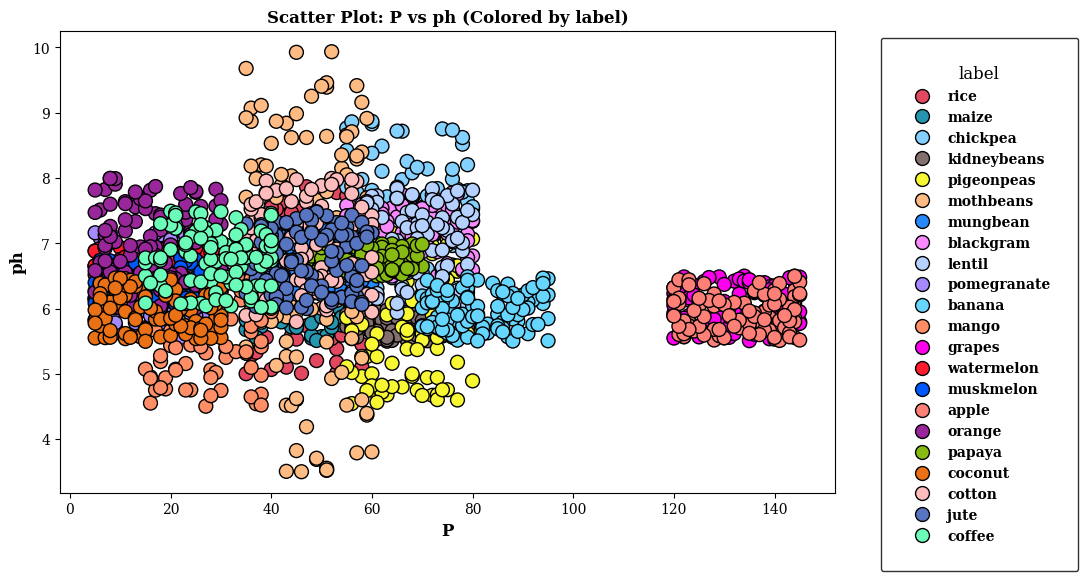

In [62]:
# Assuming df_filled contains the relevant columns
x_column = 'P'
y_column = 'ph'
hue_column = 'label'  # Replace with the third variable you want to use for color

# Define custom colors for the bars
custom_colors = ['#e34861' , '#2595b0','#84d0ff', '#846f6f', '#f7f733', '#ffbb84', '#2889ff', '#f989ff', '#b5d1ff', '#a789ff',
                 '#66d6ff', '#ff8e66', '#ff00ee', '#ff1c2e', '#0058fc', '#ff8077','#99269b','#87ba12', '#ea7115','#ffbcbc',
                 '#5775c1', '#6afcb8']

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}
font2 = {'family': 'Serif', 'weight': 'bold', 'size': 10}

plt.figure(figsize=(10, 6))

# Create a scatter plot for 'Size' against another numeric column with hue
sns.scatterplot(
    x=df[x_column],
    y=df[y_column],
    hue=df[hue_column],
    palette=custom_colors,
    s=100,               # Adjust the size of the circles
    linewidth=1,        # Adjust the border width
    edgecolor='black'   # Set the border color of the circles to black
)

# Set title and axis labels using custom fontdict
plt.title(f'Scatter Plot: {x_column} vs {y_column} (Colored by {hue_column})', fontdict=font)
plt.xlabel(x_column, fontdict=font)
plt.ylabel(y_column, fontdict=font)

plt.xticks(fontname='Serif', fontsize=10)
plt.yticks(fontname='Serif', fontsize=10)


# Display a legend with custom font and styling outside the plot
legend = plt.legend(title=hue_column,
                    prop=font2,
                    fontsize=8,
                    fancybox=True,
                    frameon=True,
                    facecolor='white',
                    edgecolor='black',
                    borderpad=2,
                    bbox_to_anchor=(1.05, 1),
                    loc='upper left')
legend.get_title().set_fontsize(12)  # Adjust the font size of the legend title
legend.get_title().set_fontfamily('Serif')  # Adjust the font family of the legend title

plt.show()


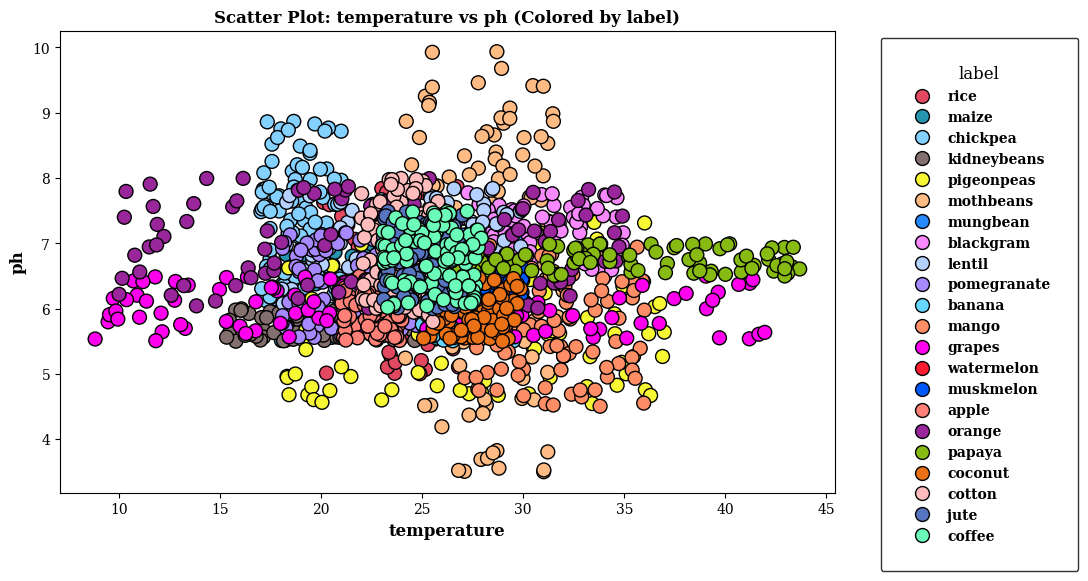

In [63]:
# Assuming df_filled contains the relevant columns
x_column = 'temperature'
y_column = 'ph'
hue_column = 'label'  # Replace with the third variable you want to use for color

# Define custom colors for the bars
custom_colors = ['#e34861' , '#2595b0','#84d0ff', '#846f6f', '#f7f733', '#ffbb84', '#2889ff', '#f989ff', '#b5d1ff', '#a789ff',
                 '#66d6ff', '#ff8e66', '#ff00ee', '#ff1c2e', '#0058fc', '#ff8077','#99269b','#87ba12', '#ea7115','#ffbcbc',
                 '#5775c1', '#6afcb8']

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}
font2 = {'family': 'Serif', 'weight': 'bold', 'size': 10}

plt.figure(figsize=(10, 6))

# Create a scatter plot for 'Size' against another numeric column with hue
sns.scatterplot(
    x=df[x_column],
    y=df[y_column],
    hue=df[hue_column],
    palette=custom_colors,
    s=100,               # Adjust the size of the circles
    linewidth=1,        # Adjust the border width
    edgecolor='black'   # Set the border color of the circles to black
)

# Set title and axis labels using custom fontdict
plt.title(f'Scatter Plot: {x_column} vs {y_column} (Colored by {hue_column})', fontdict=font)
plt.xlabel(x_column, fontdict=font)
plt.ylabel(y_column, fontdict=font)

plt.xticks(fontname='Serif', fontsize=10)
plt.yticks(fontname='Serif', fontsize=10)


# Display a legend with custom font and styling outside the plot
legend = plt.legend(title=hue_column,
                    prop=font2,
                    fontsize=8,
                    fancybox=True,
                    frameon=True,
                    facecolor='white',
                    edgecolor='black',
                    borderpad=2,
                    bbox_to_anchor=(1.05, 1),
                    loc='upper left')
legend.get_title().set_fontsize(12)  # Adjust the font size of the legend title
legend.get_title().set_fontfamily('Serif')  # Adjust the font family of the legend title

plt.show()


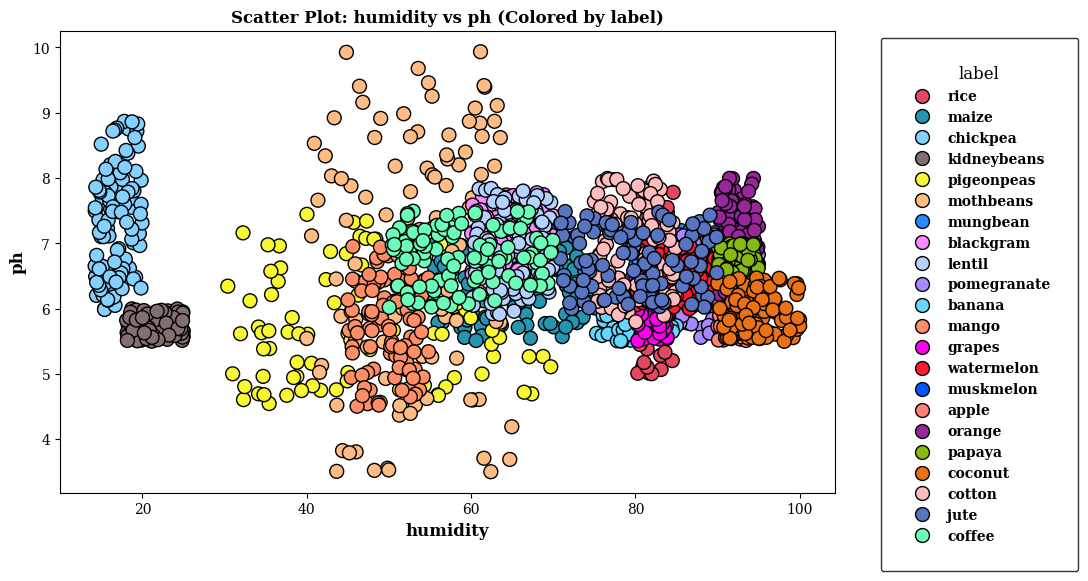

In [64]:
# Assuming df_filled contains the relevant columns
x_column = 'humidity'
y_column = 'ph'
hue_column = 'label'  # Replace with the third variable you want to use for color

# Define custom colors for the bars
custom_colors = ['#e34861' , '#2595b0','#84d0ff', '#846f6f', '#f7f733', '#ffbb84', '#2889ff', '#f989ff', '#b5d1ff', '#a789ff',
                 '#66d6ff', '#ff8e66', '#ff00ee', '#ff1c2e', '#0058fc', '#ff8077','#99269b','#87ba12', '#ea7115','#ffbcbc',
                 '#5775c1', '#6afcb8']

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}
font2 = {'family': 'Serif', 'weight': 'bold', 'size': 10}

plt.figure(figsize=(10, 6))

# Create a scatter plot for 'Size' against another numeric column with hue
sns.scatterplot(
    x=df[x_column],
    y=df[y_column],
    hue=df[hue_column],
    palette=custom_colors,
    s=100,               # Adjust the size of the circles
    linewidth=1,        # Adjust the border width
    edgecolor='black'   # Set the border color of the circles to black
)

# Set title and axis labels using custom fontdict
plt.title(f'Scatter Plot: {x_column} vs {y_column} (Colored by {hue_column})', fontdict=font)
plt.xlabel(x_column, fontdict=font)
plt.ylabel(y_column, fontdict=font)

plt.xticks(fontname='Serif', fontsize=10)
plt.yticks(fontname='Serif', fontsize=10)


# Display a legend with custom font and styling outside the plot
legend = plt.legend(title=hue_column,
                    prop=font2,
                    fontsize=8,
                    fancybox=True,
                    frameon=True,
                    facecolor='white',
                    edgecolor='black',
                    borderpad=2,
                    bbox_to_anchor=(1.05, 1),
                    loc='upper left')
legend.get_title().set_fontsize(12)  # Adjust the font size of the legend title
legend.get_title().set_fontfamily('Serif')  # Adjust the font family of the legend title

plt.show()


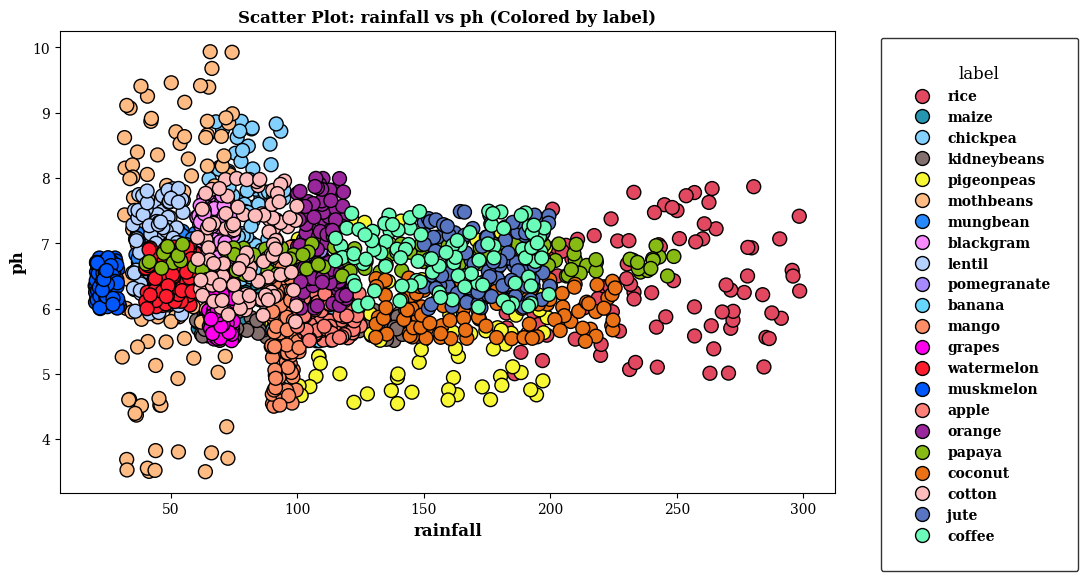

In [65]:
# Assuming df_filled contains the relevant columns
x_column = 'rainfall'
y_column = 'ph'
hue_column = 'label'  # Replace with the third variable you want to use for color

# Define custom colors for the bars
custom_colors = ['#e34861' , '#2595b0','#84d0ff', '#846f6f', '#f7f733', '#ffbb84', '#2889ff', '#f989ff', '#b5d1ff', '#a789ff',
                 '#66d6ff', '#ff8e66', '#ff00ee', '#ff1c2e', '#0058fc', '#ff8077','#99269b','#87ba12', '#ea7115','#ffbcbc',
                 '#5775c1', '#6afcb8']

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}
font2 = {'family': 'Serif', 'weight': 'bold', 'size': 10}

plt.figure(figsize=(10, 6))

# Create a scatter plot for 'Size' against another numeric column with hue
sns.scatterplot(
    x=df[x_column],
    y=df[y_column],
    hue=df[hue_column],
    palette=custom_colors,
    s=100,               # Adjust the size of the circles
    linewidth=1,        # Adjust the border width
    edgecolor='black'   # Set the border color of the circles to black
)

# Set title and axis labels using custom fontdict
plt.title(f'Scatter Plot: {x_column} vs {y_column} (Colored by {hue_column})', fontdict=font)
plt.xlabel(x_column, fontdict=font)
plt.ylabel(y_column, fontdict=font)

plt.xticks(fontname='Serif', fontsize=10)
plt.yticks(fontname='Serif', fontsize=10)


# Display a legend with custom font and styling outside the plot
legend = plt.legend(title=hue_column,
                    prop=font2,
                    fontsize=8,
                    fancybox=True,
                    frameon=True,
                    facecolor='white',
                    edgecolor='black',
                    borderpad=2,
                    bbox_to_anchor=(1.05, 1),
                    loc='upper left')
legend.get_title().set_fontsize(12)  # Adjust the font size of the legend title
legend.get_title().set_fontfamily('Serif')  # Adjust the font family of the legend title

plt.show()


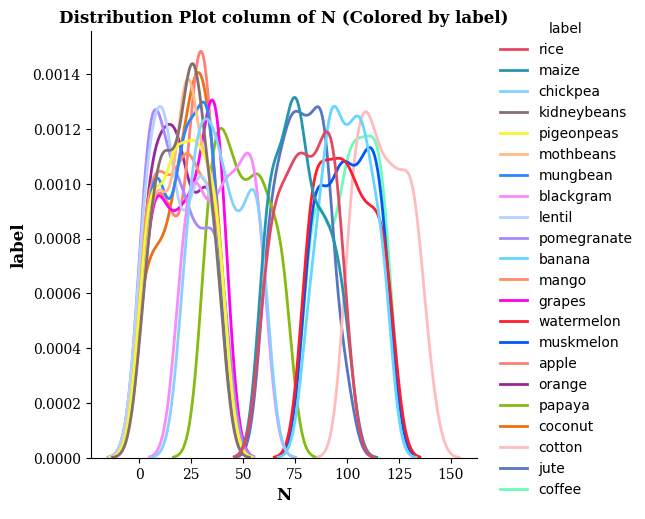

In [73]:
x_column = "N"
hue = "label"

# Define custom colors for the bars
custom_colors = ['#e34861' , '#2595b0','#84d0ff', '#846f6f', '#f7f733', '#ffbb84', '#2889ff', '#f989ff', '#b5d1ff', '#a789ff',
                 '#66d6ff', '#ff8e66', '#ff00ee', '#ff1c2e', '#0058fc', '#ff8077','#99269b','#87ba12', '#ea7115','#ffbcbc',
                 '#5775c1', '#6afcb8']

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}
font2 = {'family': 'Serif', 'weight': 'bold', 'size': 10}

plt.rcParams["figure.figsize"] = (20, 6)

sns.displot(data=df,
            x=x_column,
            hue=hue,
            kind="kde",
            palette=custom_colors,
            linewidth=2)


# Set title and axis labels using custom fontdict
plt.title(f'Distribution Plot column of {x_column} (Colored by {hue_column})', fontdict=font)
plt.xlabel(x_column, fontdict=font)
plt.ylabel(hue, fontdict=font)

plt.xticks(fontname='Serif', fontsize=10)
plt.yticks(fontname='Serif', fontsize=10)

legend.get_title().set_fontsize(12)  # Adjust the font size of the legend title
legend.get_title().set_fontfamily('Serif')  # Adjust the font family of the legend title

plt.show()


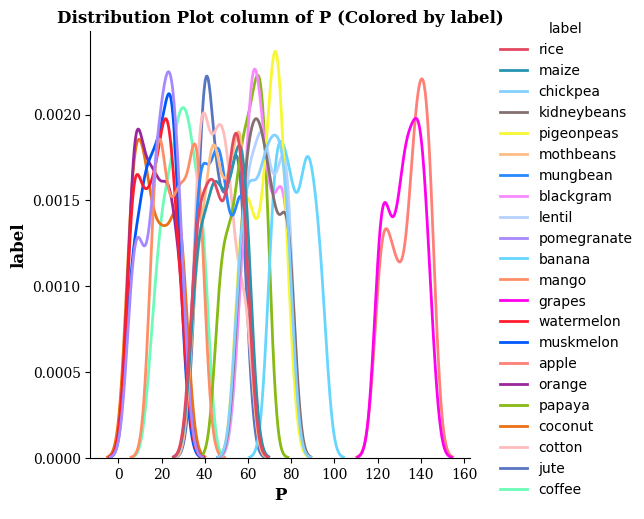

In [74]:
x_column = "P"
hue = "label"

# Define custom colors for the bars
custom_colors = ['#e34861' , '#2595b0','#84d0ff', '#846f6f', '#f7f733', '#ffbb84', '#2889ff', '#f989ff', '#b5d1ff', '#a789ff',
                 '#66d6ff', '#ff8e66', '#ff00ee', '#ff1c2e', '#0058fc', '#ff8077','#99269b','#87ba12', '#ea7115','#ffbcbc',
                 '#5775c1', '#6afcb8']

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}
font2 = {'family': 'Serif', 'weight': 'bold', 'size': 10}

plt.rcParams["figure.figsize"] = (20, 6)

sns.displot(data=df,
            x=x_column,
            hue=hue,
            kind="kde",
            palette=custom_colors,
            linewidth=2)


# Set title and axis labels using custom fontdict
plt.title(f'Distribution Plot column of {x_column} (Colored by {hue_column})', fontdict=font)
plt.xlabel(x_column, fontdict=font)
plt.ylabel(hue, fontdict=font)

plt.xticks(fontname='Serif', fontsize=10)
plt.yticks(fontname='Serif', fontsize=10)

legend.get_title().set_fontsize(12)  # Adjust the font size of the legend title
legend.get_title().set_fontfamily('Serif')  # Adjust the font family of the legend title

plt.show()


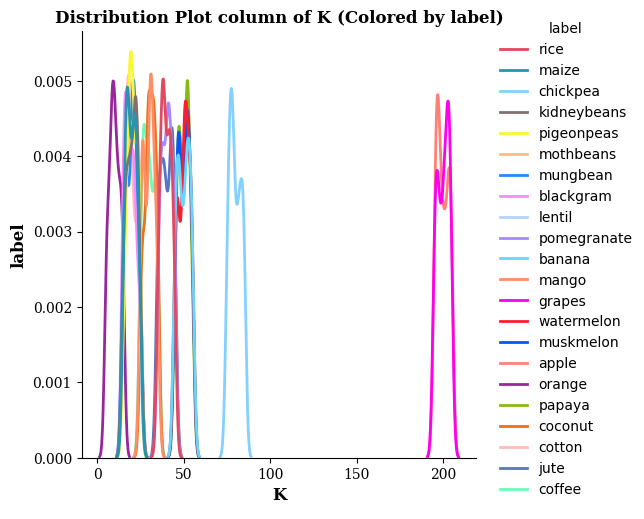

In [75]:
x_column = "K"
hue = "label"

# Define custom colors for the bars
custom_colors = ['#e34861' , '#2595b0','#84d0ff', '#846f6f', '#f7f733', '#ffbb84', '#2889ff', '#f989ff', '#b5d1ff', '#a789ff',
                 '#66d6ff', '#ff8e66', '#ff00ee', '#ff1c2e', '#0058fc', '#ff8077','#99269b','#87ba12', '#ea7115','#ffbcbc',
                 '#5775c1', '#6afcb8']

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}
font2 = {'family': 'Serif', 'weight': 'bold', 'size': 10}

plt.rcParams["figure.figsize"] = (20, 6)

sns.displot(data=df,
            x=x_column,
            hue=hue,
            kind="kde",
            palette=custom_colors,
            linewidth=2)


# Set title and axis labels using custom fontdict
plt.title(f'Distribution Plot column of {x_column} (Colored by {hue_column})', fontdict=font)
plt.xlabel(x_column, fontdict=font)
plt.ylabel(hue, fontdict=font)

plt.xticks(fontname='Serif', fontsize=10)
plt.yticks(fontname='Serif', fontsize=10)

legend.get_title().set_fontsize(12)  # Adjust the font size of the legend title
legend.get_title().set_fontfamily('Serif')  # Adjust the font family of the legend title

plt.show()
